# **BASIC EXPLORATORY DATA ANALYSIS ON THE GOLDEN GLOBES AWARDS DATASET FROM 1944 TO 2020**

## **Importing required libraries**

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/golden-globe-awards/golden_globe_awards.csv


In [6]:
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)

## **Displaying a preview of the dataset**

In [7]:
df = pd.read_csv("/kaggle/input/golden-globe-awards/golden_globe_awards.csv")
df.head(5)

,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [8]:
df.tail(5)

,year_film,year_award,ceremony,category,nominee,film,win
7986,2019,2020,77,Best Performance by an Actor in a Supporting R...,Kieran Culkin,Succession,False
7987,2019,2020,77,Best Performance by an Actor in a Supporting R...,Andrew Scott,Fleabag,False
7988,2019,2020,77,Best Performance by an Actor in a Supporting R...,Henry Winkler,Barry,False
7989,2019,2020,77,Cecil B. deMille Award,Tom Hanks,NaN,False
7990,2019,2020,77,Carol Burnett Award,Ellen DeGeneres,NaN,False


In [11]:
df.dtypes

year_film      int64
year_award     int64
ceremony       int64
category      object
nominee       object
film          object
win             bool
dtype: object

The dataset contains data regarding all the Golden Globes awards from 1944 to 2020

In [12]:
print(df.isnull().sum())

year_film        0
year_award       0
ceremony         0
category         0
nominee          0
film          1800
win              0
dtype: int64


As we can see there are 1800 missing values in the film category (for example, awards given to an actor as a recognizition to their whole career)

For this reason we are going to focus on the analysis concerning the nominees and disregard the analysis of the films nominated on the Golden Globes.

## **Exploratory Data Analysis**

### **Number of unique nominees**

In [13]:
print('Number of unique nominees: ', df['nominee'].nunique())

Number of unique nominees:  4292


### **Number of unique films**

In [14]:
print('Number of unique films: ', df['film'].nunique())

Number of unique films:  3083


### **Most awarded nominee**

In [18]:
nominee_most_awards = df.groupby('nominee')['win'].sum()
nominee_most_awards = pd.DataFrame(nominee_most_awards[nominee_most_awards == nominee_most_awards.max()])
nominee_most_awards

,win
nominee,
Meryl Streep,8.0


### **Most nominated nominee**

In [19]:
nominee_most_awards = df.groupby('nominee')['win'].count()
nominee_most_awards = pd.DataFrame(nominee_most_awards[nominee_most_awards == nominee_most_awards.max()])
nominee_most_awards

,win
nominee,
Meryl Streep,33


### **Nominees having won at least 10 awards**

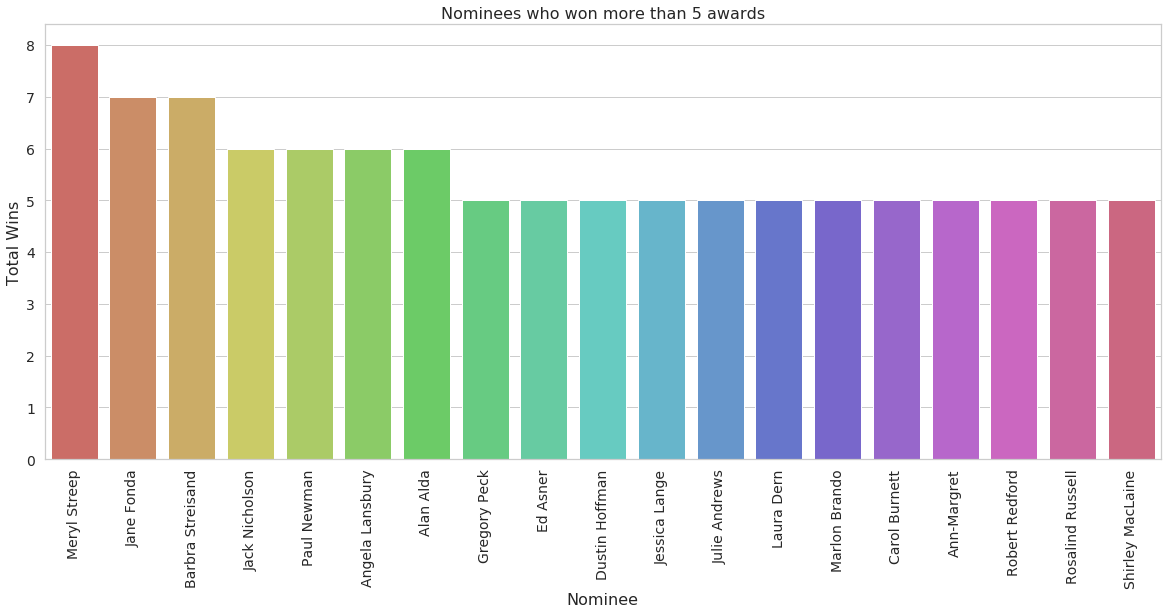

In [28]:
more_5_win = df.groupby('nominee')['win'].sum()
more_5_win = more_5_win.reset_index()
more_5_win = more_5_win[more_5_win['win'] >= 5].sort_values(ascending=False, by='win')

plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.barplot(x='nominee', y='win', data=more_5_win, palette='hls')
plt.title('Nominees who won more than 5 awards', fontsize=16)
plt.xlabel('Nominee', fontsize=16)
plt.ylabel('Total Wins', fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

## **Nominees nominated more than 15 times**

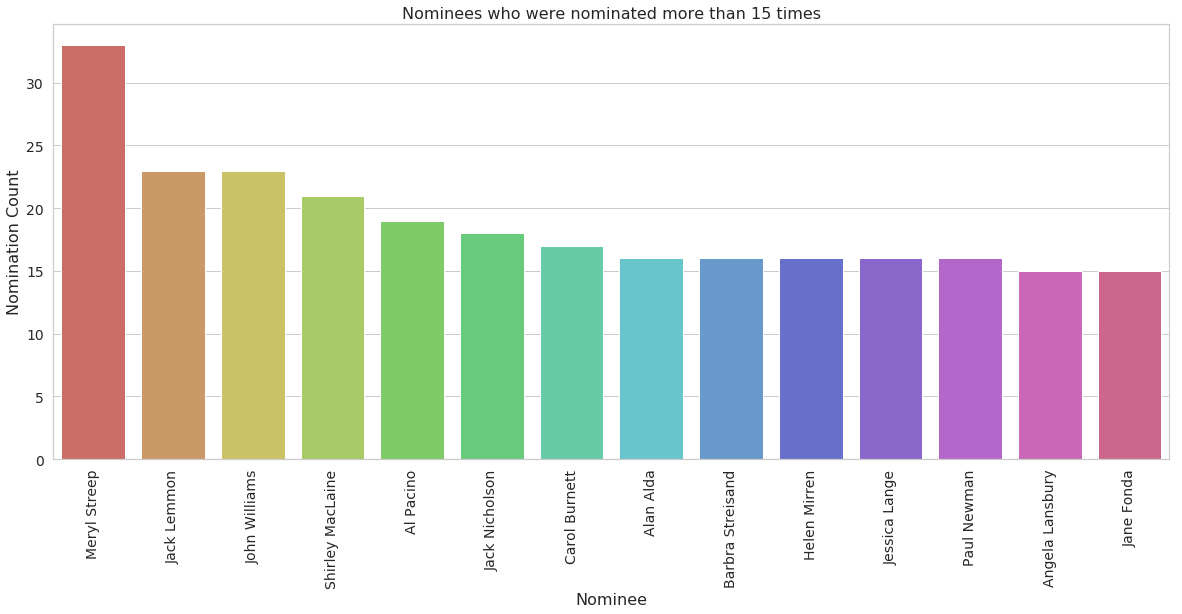

In [27]:
more_15_nominated = df.groupby('nominee')['win'].count()
more_15_nominated = more_15_nominated.reset_index()
more_15_nominated = more_15_nominated[more_15_nominated['win'] >= 15].sort_values(ascending=False, by='win')

# top_10_nominated
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.barplot(x='nominee', y='win', data=more_15_nominated, palette='hls')
plt.title('Nominees who were nominated more than 15 times', fontsize=16)
plt.xlabel('Nominee', fontsize=16)
plt.ylabel('Nomination Count', fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

#### **As we can conclude, Meryl Streep is the most nominated and awarded nominee of the history of the Golden Globes.**